# Random Forest Regression

Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

## Aggregated Data
The aggregated data from the previous step is stored here as `harvest`. The harvest data is stored in a csv file. 

I have reorganized (grouped) the aggregated data by the "day of year" and "angler", giving us the havest size per trip (day) for each angler. By grouping the data by day (or fishing "trip"), we reduced the number of records from 4336 to 2381.

Our weather data are recorded by 24 hour averages, so this regrouping of our data into days works well.

In [2]:
# input aggregated harvest, from iNatrualist and World Weather Online
harvest = "C:\Users\steph\Documents\Python\Projects\Silas\Demo\RandomForest_HarvestTrip_Demo.csv"

## Data cleanup
The harvest data needs more cleaned up. Instead of manipulating the data with excel, I'm going to test my hand at dataframes using Pandas. Apparently it's all the rage these days. 

In [3]:
# set the harvest data to the object fish
fish = pd.read_csv(harvest)
# create a dataframe using the harvest records and weather variables
df = pd.DataFrame(fish)

# view top 5 rows
print(df.head())

   dayofyear        angler  harvest_size  month  cloud_cover  temp_f  \
0          1   cuihenggang             1      1         53.0    36.0   
1          1  evanator4000             1      1         69.0    73.0   
2          1    teeland007             1      1         24.0    31.0   
3          2    bigcattrek             1      1         87.0    49.0   
4          2       carrion             1      1         58.0    58.0   

   humidity  wind_direction_degrees  wind_speed_kmph  pressure_mb  dewpoint_f  \
0      56.0                   154.0              7.0       1026.0        14.0   
1      85.0                   219.0              6.0       1010.0        58.0   
2      91.0                   196.0             10.0       1021.0        26.0   
3      82.0                   230.0             11.0       1017.0        40.0   
4      75.0                    70.0              6.0       1021.0        43.0   

   head_index_f  percipitation_mm  visualbility_km  moon_phase  angler_id  \
0  

Drop fields (labels) that are not needed for the regression analysis.

In [4]:
# drop fields from dataframe that we do not need
df = df.drop(['dayofyear', 'angler', 'angler_id', 'harvest_id', 'moon_phase'], axis=1)

# view top 5 rows
print(df.head())

   harvest_size  month  cloud_cover  temp_f  humidity  wind_direction_degrees  \
0             1      1         53.0    36.0      56.0                   154.0   
1             1      1         69.0    73.0      85.0                   219.0   
2             1      1         24.0    31.0      91.0                   196.0   
3             1      1         87.0    49.0      82.0                   230.0   
4             1      1         58.0    58.0      75.0                    70.0   

   wind_speed_kmph  pressure_mb  dewpoint_f  head_index_f  percipitation_mm  \
0              7.0       1026.0        14.0          28.0               0.0   
1              6.0       1010.0        58.0          63.0               0.2   
2             10.0       1021.0        26.0          27.0               0.0   
3             11.0       1017.0        40.0          46.0               3.0   
4              6.0       1021.0        43.0          51.0               0.0   

   visualbility_km  
0             10.

In [ ]:
print(type(df))

## Prepare Test and Trainig Datasets 
This is where we create some test and training datasets for the 
random forest regression model. This allows us to test the model that we 
create on a subset of the data. This process helps to avoid overfitting the model on the training dataset.

Before we create the train and test data, We only want to include the attributes (columns, labels, whatever) that are used in predicting harvest size, which is why we use `iloc`

Then, using `train_test_split` we randomly assign a portion of our data as training data.

In [5]:
# quick and dirty assinging some rows to test data
Xfish = df.iloc[:, 1:12]
yfish = df.iloc[:, 0:1]
X_train, X_test, y_train, y_test = train_test_split(Xfish, yfish, random_state=13)

In [ ]:
# see how many observations for each dataframe
print "Number of oberservations in training data: ", len(X_train)
print "Number of oberservations in test data: ", len(X_test)
print "Total number of observations in model: ", len(X_train) + len(X_test)

In [ ]:
# view X training data
print(X_train)
print "Number of oberservations in training data: ", len(X_train)

In [ ]:
# view X training data
print(X_test)
print "Number of oberservations in training data: ", len(X_test)

In [ ]:
# view y training data
print(y_train)
print "Number of oberservations in y training data: ", len(y_train)

In [ ]:
# view y test data
print(y_test)
print "Number of oberservations in y test data: ", len(y_test)

## Random Forest Regression

In [6]:
# create random forest regressor object
regressor = RandomForestRegressor(n_estimators=300, criterion='mse', random_state=13, n_jobs=-1).fit(X_train, y_train)
regimport = regressor.feature_importances_
Importance = pd.DataFrame(data=regimport, index=X_train.columns,  columns=['Importance'])
print Importance

C:\Users\steph\Documents\Anaconda\Anaconda2\envs\silas27\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


                        Importance
month                     0.042214
cloud_cover               0.094410
temp_f                    0.138504
humidity                  0.087394
wind_direction_degrees    0.118770
wind_speed_kmph           0.105472
pressure_mb               0.079796
dewpoint_f                0.129819
head_index_f              0.088271
percipitation_mm          0.053849
visualbility_km           0.061502


In [7]:
Importance2 = Importance.sort_values(by=['Importance'],ascending=False)[:]
#view feature importance dataframe
print Importance2

                        Importance
temp_f                    0.138504
dewpoint_f                0.129819
wind_direction_degrees    0.118770
wind_speed_kmph           0.105472
cloud_cover               0.094410
head_index_f              0.088271
humidity                  0.087394
pressure_mb               0.079796
visualbility_km           0.061502
percipitation_mm          0.053849
month                     0.042214


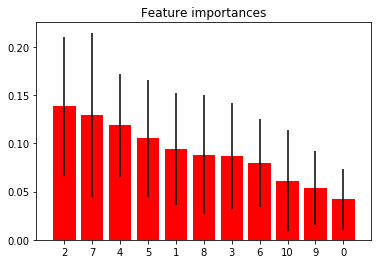

In [8]:
#calculate standard deviation
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(regimport)[::-1]

# Print the feature ranking
#print("Feature ranking:")
#for f in range(X_train.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], regimport[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), regimport[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

We can then use the test set to see how good a fit the model is and also plot the predicted values against the actual values

In [1]:
# Returns score of test and training models at predicting y variable
scoretrain = regressor.score(X_train, y_train)
scoretest = regressor.score(X_test, y_test)
print "Harvest dataset"
print "Accuracy of RF regressor on training set: {:.2f}".format(scoretrain)
print "Accuracy of RF regressor on test set: {:.2f}".format(scoretest)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Harvest dataset")? (<ipython-input-1-ec48ff55dbac>, line 4)

In [2]:
# Predict regression target for Xtrain
y_train_pred = regressor.predict(X_train)
print"\nRegression prediction of train data\n", y_train_pred, "\n"

# Predict regression target for Xtest
y_test_pred = regressor.predict(X_test)
print"\nRegression prediction of train data\n",y_test_pred, "\n"

SyntaxError: invalid syntax (<ipython-input-2-4dc6ba83ba66>, line 3)

In [ ]:
print("MSE train: %.3f, test: %.3f" % (mean_absolute_error(y_train, y_train_pred),
    mean_absolute_error(y_test, y_test_pred),))
print("R^2 train: %.3f, test: %.3f" % (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred),))

In [ ]:
plt.scatter(y_test, y_test_pred, c="red")
plt.xlim([0,15])
plt.ylim([0,15])
plt.plot([0,15], [0,15])
plt.grid(True)